In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lib.utils import load_dataset, plot_image, describe_data, reshape_X
from lib.logistic import LogisticRegression

In [2]:
# Load data
X_train_orig, y_train, X_test_orig, y_test, classes = load_dataset()

In [3]:
describe_data(X_train_orig, y_train, X_test_orig, y_test)

--------------------------------------------------
Number of training samples: 209
Number of testing samples: 50
X_train_orig shape: (209, 64, 64, 3)
y_train shape: (209,)
X_test_orig shape: (50, 64, 64, 3)
y_test shape: (50,)
--------------------------------------------------


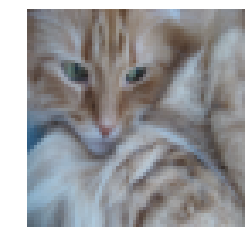

In [4]:
plot_image(X_train_orig, y_train, 2)

In [5]:
n_samples_train = X_train_orig.shape[0]
n_samples_test = X_test_orig.shape[0]

### Flattern feature array

In [6]:
X_train_flattern = X_train_orig.reshape(n_samples_train, -1)
X_test_flattern = X_test_orig.reshape(n_samples_test, -1)

### Standardize feature array

In [7]:
X_train = X_train_flattern / 255.
X_test = X_test_flattern / 255.
X_train.shape

(209, 12288)

In [8]:
logistic = LogisticRegression(learning_rate=0.009, max_iter=2000)
logistic.fit(X_train, y_train)

In [9]:
for i, cost in enumerate(logistic.costs):
    if i % 100 == 0:
        print(cost)

0.6931471805599453
0.7261945187614043
1.4522765553938535
0.8716543114137313
0.617655175002006
0.4091315522640149
0.24864022021343254
0.16836377913742429
0.1503986900920975
0.13950283002633412
0.13031276344594211
0.12232002644747177
0.11525657225912321
0.10895103551618009
0.10328070143357532
0.09815171898160303
0.0934894582033197
0.0892331028112817
0.08533226556893439
0.0817446918525022


In [10]:
accuracy_train = logistic.get_accuracy(X_train, y_train)
accuracy_test = logistic.get_accuracy(X_test, y_test)
print("Accuracy on training data: {}".format(accuracy_train))
print("Accuracy on testing data: {}".format(accuracy_test))

Accuracy on training data: 0.9952153110047847
Accuracy on testing data: 0.7


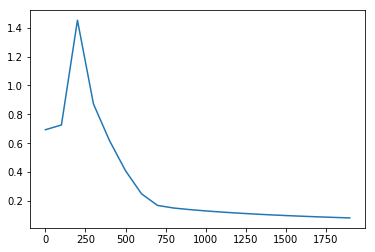

In [11]:
plt.plot(range(0, 2000, 100), [cost for i, cost in enumerate(logistic.costs) if i % 100 == 0])